In [23]:
import numpy as np
from importlib import reload
from scipy import signal

import plotting_tools as pt
import utils
utils = reload(utils)
pt = reload(pt)

import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

In [24]:
Nx, Ny, Nz = 64, 1, 64
Nx, Ny = 100, 50
et = 10.0

def load(Nx,Ny,et):
    base_fn = 'output_swe_vortex'
    base_fn = 'output_rising_bubble'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,et)

In [42]:
N = 10
# sfx0 = 'debug_daext'
sfx0 = 'wdawloc_1.0_rhou_rhow_p0.2_tra_corr_2pi'
sfx0 = 'wdawloc_pp_rhou_rhow_tra'
sfx0 = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm_test'
sfx0 = tc.cb_suffix(1,0, '%s' %(sfx0))
# sfx = sfx0

fn_pickle = tc.get_filename(N,sfx0,format='dat')
path_pickle = tc.get_path(fn_pickle)

i2 = (slice(2,-2),slice(2,-2))

file = open(path_pickle,'rb')
ud = pickle.load(file)
elem = pickle.load(file)
node = pickle.load(file)
obs = pickle.load(file)
obs_noisy = pickle.load(file)
obs_noisy_interp = pickle.load(file)
obs_mask = pickle.load(file)
obs_covar = pickle.load(file)
file.close()

In [43]:
attr = 'rhov'

print(obs[0][attr].shape)
print(obs_noisy[0][attr].shape)
print(obs_noisy_interp[0][attr].shape)
print(obs_mask[0][attr].sum())
print(obs_covar.shape)

time_len = len(obs)
print(time_len)

(104, 54)
(104, 54)
(104, 54)
5616.0
(40, 2)
40


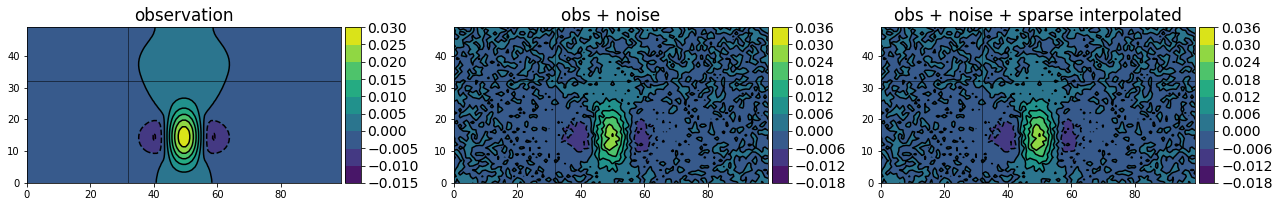

In [44]:
time_index = 3
attribute = attr
obs_arr = obs[time_index][attribute][i2].T
obs_arr = [obs_arr, 'observation']
obs_n_arr = obs_noisy[time_index][attribute][i2].T
obs_n_arr = [obs_n_arr, 'obs + noise']
obs_ni_arr = obs_noisy_interp[time_index][attribute][i2].T
obs_ni_arr = [obs_ni_arr, 'obs + noise + sparse interpolated']
obs_mask_arr = obs_mask[time_index][attribute]
# obs_mask_arr = [obs_mask_arr, 'obs_mask']

arr_lst = [obs_arr, obs_n_arr, obs_ni_arr]

ncolslen = 3
fs = (18,12)
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)
_ = pl.plot(aspect='equal',method='contour')
pl.save_fig('obs_noise_sparse_interpolated')

fraction of non-zero entries: 0.5


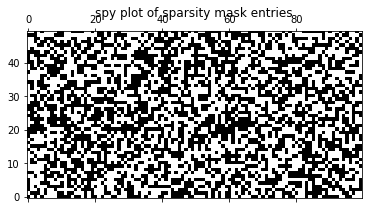

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

i2 = (slice(2,-2),slice(2,-2))

fig = plt.figure(figsize=(6,5))
plt.spy(obs_mask_arr[i2].T, origin='lower')
obs_mask_arr_shp = obs_mask_arr[i2].shape[0] * obs_mask_arr[i2].shape[1]
print("fraction of non-zero entries:", obs_mask_arr[i2].sum() / obs_mask_arr_shp)
plt.title("spy plot of sparsity mask entries")
plt.savefig("spy_mask.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [40]:
print(obs_covar)

[[1.13204365e-03 2.26310927e-07]
 [1.13210141e-03 9.29866873e-07]
 [1.13226266e-03 2.10761864e-06]
 [1.13180802e-03 3.73033849e-06]
 [1.13251980e-03 5.78640714e-06]
 [1.13194779e-03 8.23232338e-06]
 [1.13206992e-03 1.09018196e-05]
 [1.13261608e-03 1.38339465e-05]
 [1.13157242e-03 1.70444575e-05]
 [1.13254788e-03 2.00908482e-05]
 [1.13194378e-03 2.34539774e-05]
 [1.13221071e-03 2.65401841e-05]
 [1.13214072e-03 2.95583370e-05]
 [1.13161453e-03 3.24370467e-05]
 [1.13238320e-03 3.52919115e-05]
 [1.13201758e-03 3.77184362e-05]
 [1.13236394e-03 3.98706291e-05]
 [1.13204445e-03 4.28540229e-05]
 [1.13207012e-03 4.55297095e-05]
 [1.13238922e-03 4.81157279e-05]
 [1.13188122e-03 4.96128689e-05]
 [1.13206691e-03 5.14468346e-05]
 [1.13251839e-03 5.34236294e-05]
 [1.13214954e-03 5.37808114e-05]
 [1.13228392e-03 5.46568827e-05]
 [1.13237377e-03 5.51413654e-05]
 [1.13183650e-03 5.41488653e-05]
 [1.13219607e-03 5.44211975e-05]
 [1.13162656e-03 5.24915862e-05]
 [1.13224721e-03 5.19457392e-05]
 [1.132036